In [327]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/yuvraj-daiict/exploratory-data-analysis/refs/heads/main/credit_train.csv').iloc[:500, :]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [328]:
#describing the dataset
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,5.000000e+02,417.000000,4.170000e+02,500.000000,500.000000,245.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000
mean,1.288284e+07,1056.131894,1.370992e+06,18052.649740,18.204600,36.391837,11.020000,0.194000,2.784220e+05,6.281975e+05,0.122000,0.046000
std,3.311116e+07,1440.281783,8.639414e+05,11244.785469,7.102964,21.140085,5.159927,0.518557,3.460245e+05,8.475848e+05,0.339627,0.309962
min,2.580600e+04,598.000000,1.857820e+05,472.150000,4.900000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.764015e+05,705.000000,8.489580e+05,10343.077500,13.700000,19.000000,8.000000,0.000000,1.073358e+05,2.496230e+05,0.000000,0.000000
50%,3.272060e+05,724.000000,1.166904e+06,15857.685000,16.750000,35.000000,10.000000,0.000000,2.063685e+05,4.382950e+05,0.000000,0.000000
75%,5.418380e+05,741.000000,1.634627e+06,23015.555000,21.500000,51.000000,13.000000,0.000000,3.494908e+05,7.569430e+05,0.000000,0.000000
max,1.000000e+08,7500.000000,6.906766e+06,86334.480000,50.100000,82.000000,43.000000,5.000000,5.246261e+06,1.188768e+07,2.000000,4.000000


In [329]:
df.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,83
Annual Income,83
Years in current job,27
Home Ownership,0
Purpose,0


Because the number of null values in months since last delinquent is very large, we can drop this particular column. Also as loan id and customer id are irrelevant for the loan status we dont need them for prediction

In [330]:
#dropping the 'Months since last delinquent' column and the 'Loan ID' and 'Customer ID' column
df.drop('Loan ID', axis=1, inplace=True)
df.drop('Customer ID', axis=1, inplace=True)
df.drop('Months since last delinquent', axis=1, inplace=True)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [331]:
df.isnull().sum()

,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,83
Annual Income,83
Years in current job,27
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


The number of years in current job may be null because the particular person can either be unemployed or may not have 1 year of experience in current job so we can assume it to be zero.

In [332]:
#filling the null values of 'Years in current job' column with zeros
df['Years in current job'].fillna(0, inplace=True)
df.isnull().sum()

<ipython-input-332-58dd11e91f6c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years in current job'].fillna(0, inplace=True)


,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,83
Annual Income,83
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


In [333]:
# Check for rows where both 'credit_score' and 'annual_income' are null
null_together = df[df['Credit Score'].isnull() & df['Annual Income'].isnull()]

# Display the number of such rows
print("Number of rows with both 'credit score' and 'annual income' missing:", len(null_together))

# Optionally, print the rows to inspect them
print(len(null_together))

Number of rows with both 'credit score' and 'annual income' missing: 83
83


Here, we can observe that the credit score is null only when annual income is null

In [334]:
#imputing both the credit score and annual income columns simultenously
from sklearn.impute import SimpleImputer, KNNImputer

imputer = SimpleImputer(strategy='mean')
df[['Credit Score', 'Annual Income']] = imputer.fit_transform(df[['Credit Score', 'Annual Income']])

df.isnull().sum()

,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Annual Income,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


In [335]:
#finding the number of unique values in 'Home Ownership',	'Purpose' and 'Term' columns
print(df['Home Ownership'].unique())
print(df['Purpose'].unique())
print(df['Term'].unique())
print(df['Loan Status'].unique())

['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation']
['Short Term' 'Long Term']
['Fully Paid' 'Charged Off']


In [336]:
from sklearn.preprocessing import LabelEncoder

#encoding the Term column with 0 and 1 values for short and long term
df['Term'] = df['Term'].map({'Short Term': 0, 'Long Term': 1})

#encoding the Home Ownership column
# Define the mapping based on the ordinal relationship
home_ownership_mapping = {
    'Own Home': 3,
    'Home Mortgage': 2,
    'HaveMortgage': 1,
    'Rent': 0
}


# Apply the mapping to the 'Home Ownership' column
df['Home Ownership'] = df['Home Ownership'].map(home_ownership_mapping)

# For purpose column, there seems no inherent order
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Purpose' column
df['Purpose'] = le.fit_transform(df['Purpose'])

#encoding Fully Paid as 1 and Charged Off as 0 in Loan Status
df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})

#handling years in current job column
# Function to convert job years to numeric
def convert_job_years(years):
    # Check if the input is an integer or float
    if isinstance(years, (int, float)):
        return years  # Return as is if already a number

    # Remove extra spaces and handle various formats
    years = years.strip()  # Remove leading/trailing whitespace
    try:
        if '+' in years:
            return int(years.split('+')[0]) + 1  # "10+ years" becomes 11
        elif '<' in years:
            return 0  # "< 1 year" can be represented as 0
        elif 'year' in years:
            return int(years.split()[0])  # Extract the numeric part
    except (ValueError, IndexError):
        return None  # Return None for any unexpected format

# Apply the conversion function to the 'Years in current job' column
df['Years in current job'] = df['Years in current job'].apply(convert_job_years)

df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,0,709.000000,1.167493e+06,8,2,4,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,0,1056.131894,1.370992e+06,11,2,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,0,741.000000,2.231892e+06,8,3,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,1,721.000000,8.069490e+05,3,3,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,0,1056.131894,1.370992e+06,5,0,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


Now, we have successfully handled all the null values

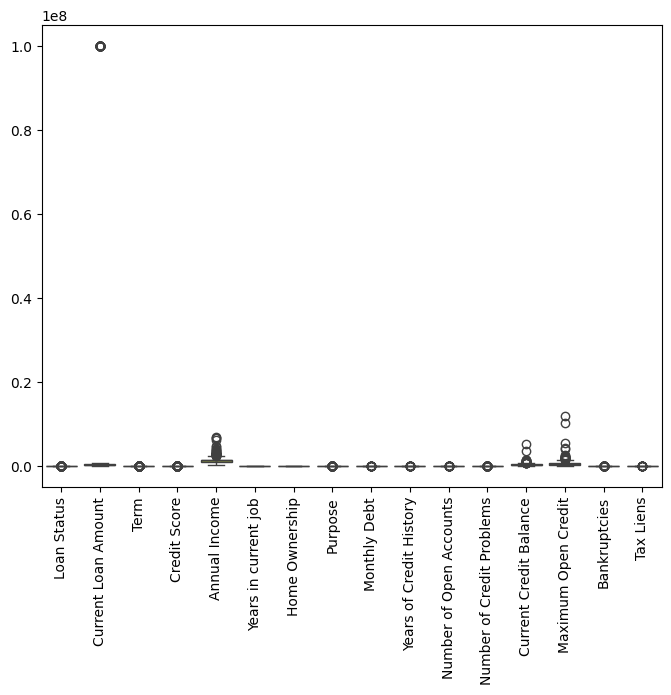

In [337]:
#plotting a boxplot for all the columns to find ouliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

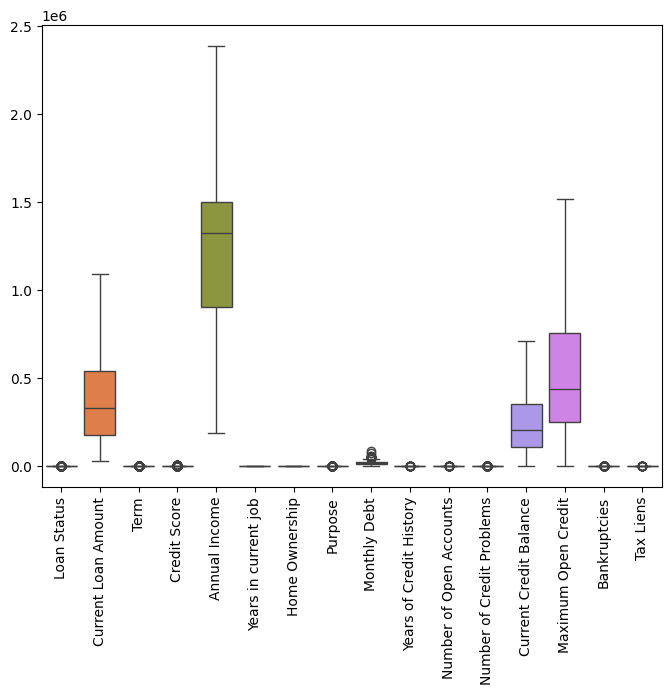

In [338]:
# Treating outliers in 'Current Loan Amount', 'Annual Income', 'Current Credit Balance' and 'Maximum Open Credit' columns
columns = ['Current Loan Amount', 'Annual Income', 'Current Credit Balance', 'Maximum Open Credit']

# Treating outliers in place
for col in columns:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(8, 6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [339]:
#selecting k best features
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop('Loan Status', axis=1)  # Features
y = df['Loan Status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with f_regression
k = 8  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector and transform the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Create a DataFrame with selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features.tolist())

X_test_selected = selector.transform(X_test)


# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Selected Features: ['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Current Credit Balance', 'Maximum Open Credit']
Accuracy: 0.85


In [340]:
#Applying PCA to the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Specify the number of principal components to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86

Confusion Matrix:
 [[ 2 14]
 [ 0 84]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22        16
           1       0.86      1.00      0.92        84

    accuracy                           0.86       100
   macro avg       0.93      0.56      0.57       100
weighted avg       0.88      0.86      0.81       100



Accuracy: 0.85

Confusion Matrix:
 [[ 2 14]
 [ 1 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.12      0.21        16
           1       0.86      0.99      0.92        84

    accuracy                           0.85       100
   macro avg       0.76      0.56      0.56       100
weighted avg       0.83      0.85      0.80       100



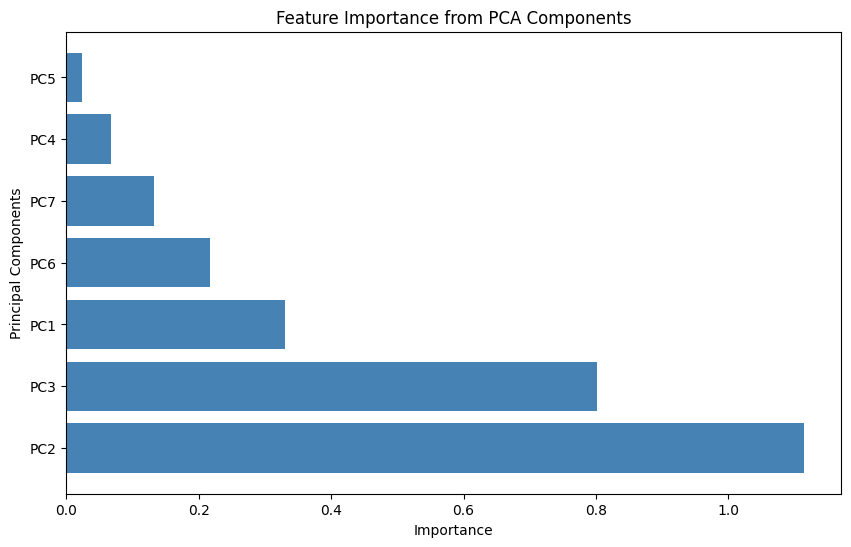

In [341]:
#Feature importance from the model

# Fit PCA and choose the number of components based on explained variance
pca = PCA()
pca.fit(X_train_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Number of components for 95% variance

# Fit PCA again with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance from Logistic Regression Model
importance = np.abs(model.coef_[0])  # Get the absolute importance of the coefficients
feature_names = [f'PC{i+1}' for i in range(n_components)]  # Principal component names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.title('Feature Importance from PCA Components')
plt.xlabel('Importance')
plt.ylabel('Principal Components')
plt.show()
